In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# Code starts here
df = pd.read_csv("train.csv")
df.head()
import warnings
warnings.filterwarnings('ignore')
# Code ends here


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131728 entries, 0 to 131727
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Id                          131728 non-null  int64  
 1   loan_amnt                   131728 non-null  float64
 2   funded_amnt                 131728 non-null  float64
 3   term                        131728 non-null  int64  
 4   int_rate                    131728 non-null  int64  
 5   installment                 131728 non-null  float64
 6   grade                       131728 non-null  int64  
 7   emp_title                   131728 non-null  int64  
 8   home_ownership              131728 non-null  int64  
 9   annual_inc                  131728 non-null  float64
 10  verification_status         131728 non-null  int64  
 11  purpose                     131728 non-null  int64  
 12  title                       131728 non-null  int64  
 13  zip_code      

In [33]:
df.describe()

,Id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,131728.000000,131728.000000,131728.000000,131728.000000,131728.000000,131728.000000,131728.000000,131728.000000,131728.000000,1.317280e+05,...,131728.000000,131728.000000,131728.000000,131728.000000,131728.000000,131728.000000,131728.000000,1.317280e+05,1.317280e+05,131728.000000
mean,65863.500000,14370.902921,14368.517324,0.236700,43.528088,444.006742,1.757204,59797.735159,1.851353,7.221257e+04,...,1.027985,191.672135,22.153759,4185.672422,0.003188,0.002756,76.412329,1.373875e+05,2.994463e+04,0.157780
std,38026.742467,8119.345134,8117.331269,0.425058,31.222483,242.536449,1.287292,32896.734237,1.931204,4.931984e+04,...,7.739098,832.208652,125.424875,5859.943110,0.059392,0.058965,803.527999,1.378873e+05,3.807659e+04,0.364536
min,0.000000,1000.000000,1000.000000,0.000000,0.000000,23.610000,0.000000,0.000000,0.000000,4.800000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,32931.750000,8000.000000,8000.000000,0.000000,20.000000,271.580000,1.000000,30813.750000,0.000000,4.500000e+04,...,0.000000,0.000000,0.000000,372.470000,0.000000,0.000000,0.000000,3.211475e+04,1.540000e+04,0.000000
50%,65863.500000,12175.000000,12175.000000,0.000000,38.000000,398.510000,2.000000,63008.500000,0.000000,6.200000e+04,...,0.000000,0.000000,0.000000,1020.340000,0.000000,0.000000,0.000000,1.274500e+05,2.700000e+04,0.000000
75%,98795.250000,20000.000000,20000.000000,0.000000,62.000000,578.370000,2.000000,86847.000000,4.000000,8.700000e+04,...,0.000000,0.000000,0.000000,6137.617500,0.000000,0.000000,0.000000,1.860092e+05,3.400000e+04,0.000000
max,131727.000000,35000.000000,35000.000000,1.000000,144.000000,1408.130000,6.000000,115186.000000,4.000000,7.141778e+06,...,536.030000,39444.370000,6124.938000,35760.200000,4.000000,5.000000,88303.000000,4.772549e+06,9.999999e+06,1.000000


In [34]:
df.columns

Index(['Id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_title', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

In [4]:
df.nunique()

Id                            131728
loan_amnt                       1212
funded_amnt                     1213
term                               2
int_rate                         144
installment                    25151
grade                              7
emp_title                      84108
home_ownership                     5
annual_inc                     11687
verification_status                3
purpose                           13
title                          33178
zip_code                         834
addr_state                        49
dti                             3498
delinq_2yrs                       19
inq_last_6mths                     9
open_acc                          54
pub_rec                           13
revol_bal                      39276
revol_util                      1058
total_acc                         83
total_rec_late_fee              2910
recoveries                     15735
collection_recovery_fee        14715
last_pymnt_amnt                96032
c

In [35]:
df.corr()

,Id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
Id,1.000000,-0.002379,-0.002312,-0.005599,-0.003878,-0.001073,-0.004068,-0.005159,-0.006878,-0.001137,...,0.001324,0.000368,0.000802,0.000835,-0.004302,-0.001182,0.001368,0.001661,-0.001789,-0.003201
loan_amnt,-0.002379,1.000000,0.999805,0.442021,0.200697,0.954859,0.192328,-0.039449,-0.205167,0.381209,...,0.080740,0.188464,0.156256,0.431530,-0.006562,0.009149,-0.019545,0.290420,0.217382,0.057871
funded_amnt,-0.002312,0.999805,1.000000,0.441768,0.200497,0.955095,0.192052,-0.039379,-0.205193,0.381185,...,0.080799,0.188404,0.156256,0.431615,-0.006548,0.009165,-0.019549,0.290479,0.217433,0.057723
term,-0.005599,0.442021,0.441768,1.000000,0.479770,0.200336,0.465309,-0.015597,-0.127125,0.087443,...,0.054516,0.187477,0.161974,0.275367,0.002883,0.011533,-0.005736,0.115360,0.052454,0.151116
int_rate,-0.003878,0.200697,0.200497,0.479770,1.000000,0.179148,0.972780,0.014888,0.096994,-0.009982,...,0.083081,0.188563,0.144610,0.135151,0.040595,0.035966,0.008973,-0.108671,-0.116316,0.211112
installment,-0.001073,0.954859,0.955095,0.200336,0.179148,1.000000,0.172597,-0.035509,-0.164611,0.380376,...,0.080220,0.161871,0.129436,0.385639,-0.002588,0.011734,-0.017587,0.256486,0.199357,0.039051
grade,-0.004068,0.192328,0.192052,0.465309,0.972780,0.172597,1.000000,0.014668,0.097038,-0.012463,...,0.082415,0.183368,0.139540,0.130444,0.039516,0.033018,0.008684,-0.109213,-0.117372,0.206929
emp_title,-0.005159,-0.039449,-0.039379,-0.015597,0.014888,-0.035509,0.014668,1.000000,0.004335,-0.047917,...,0.004095,0.005619,0.004568,-0.038006,0.001465,0.001964,0.002341,-0.035559,-0.016390,0.031085
home_ownership,-0.006878,-0.205167,-0.205193,-0.127125,0.096994,-0.164611,0.097038,0.004335,1.000000,-0.201939,...,-0.004449,-0.020647,-0.029893,-0.125144,-0.000766,-0.013603,-0.006401,-0.493815,-0.116856,0.039710
annual_inc,-0.001137,0.381209,0.381185,0.087443,-0.009982,0.380376,-0.012463,-0.047917,-0.201939,1.000000,...,0.033744,0.035492,0.031227,0.197995,0.005407,0.014077,-0.003043,0.456210,0.246819,-0.052579


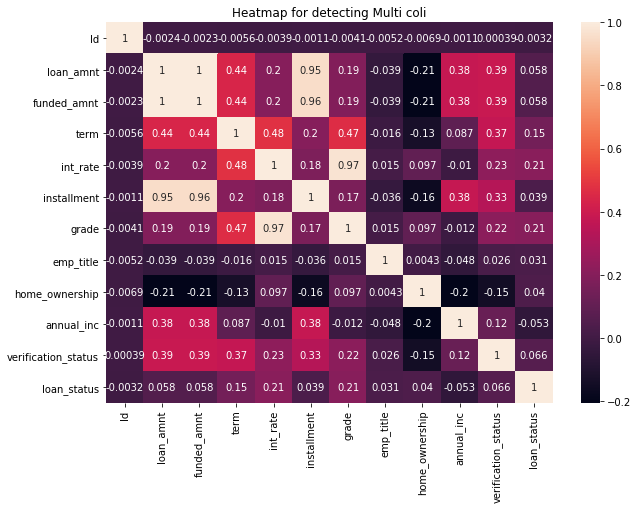

In [24]:
#Multi colinearity detection
def plot_heatmap(df, fig_size=(10,7)):
    fig = plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), annot =True)
    plt.title('Heatmap for detecting Multi coli')
    plt.show()

plot_heatmap(df[['Id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_title', 'home_ownership', 'annual_inc',
       'verification_status','loan_status']])
# 'verification_status', 'purpose', 'title', 'zip_code', 'addr_state',
#        'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
#        'revol_bal', 'revol_util', 'total_acc', 'total_rec_late_fee',
#        'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
#        'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
#        'tot_cur_bal', 'total_rev_hi_lim',

# columns to be drop--> 
# 'funded_amnt','grade''recoveries'

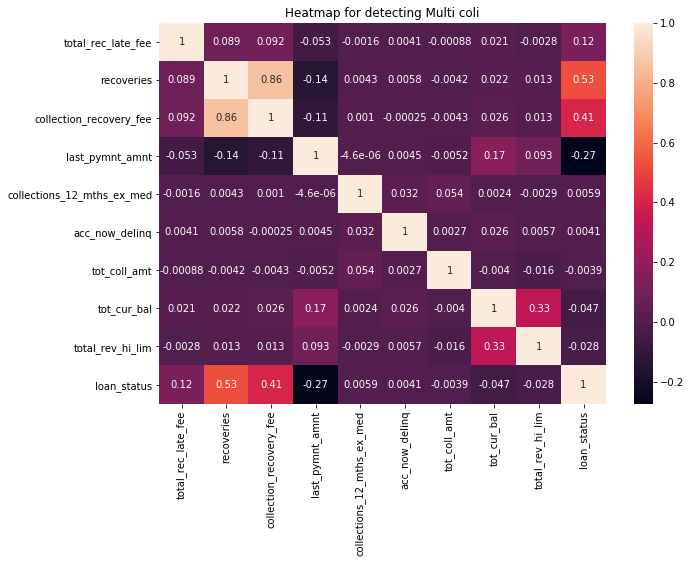

In [23]:
#Multi colinearity detection
def plot_heatmap(df, fig_size=(10,7)):
    fig = plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), annot =True)
    plt.title('Heatmap for detecting Multi coli')
    plt.show()

plot_heatmap(df[['total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']])


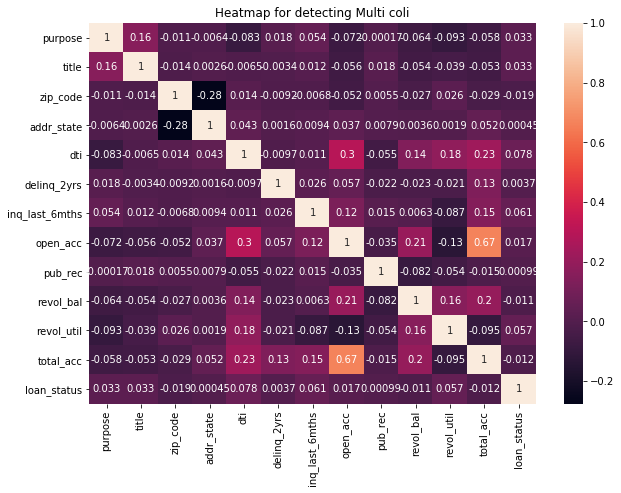

In [25]:
#Multi colinearity detection
def plot_heatmap(df, fig_size=(10,7)):
    fig = plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), annot =True)
    plt.title('Heatmap for detecting Multi coli')
    plt.show()

plot_heatmap(df[['purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc','loan_status']])


In [7]:
df.drop(['Id','funded_amnt','grade','recoveries'],axis = 1, inplace = True)

In [36]:
df.drop(['Id'],axis = 1, inplace = True)

In [40]:
results=df['loan_status'].value_counts()

In [41]:
print("Proportion of claims that are Yes: " , results[1]/(results[0] + results[1]))

Proportion of claims that are Yes:  0.15777966719300376


In [30]:
#names of all the attributes 
cols = df.columns

#number of attributes (exclude target)
size = len(cols) - 1

#x-axis has target attribute to distinguish between classes
x = cols[size]
print(x)

#y-axis shows values of an attribute
y = cols[0:size]
print(y)

loan_status
Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [42]:
df.shape

(131728, 32)

In [73]:
df.drop(['total_rev_hi_lim','tot_coll_amt'],axis = 1, inplace = True)

In [58]:
df.drop(['pub_rec','collections_12_mths_ex_med','acc_now_delinq'],axis = 1, inplace = True)

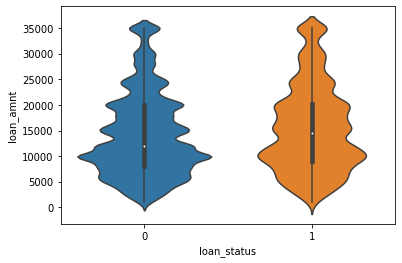

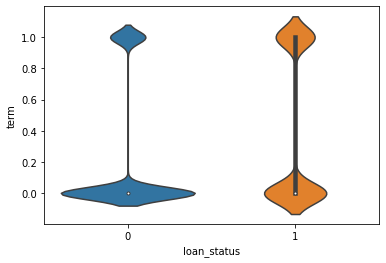

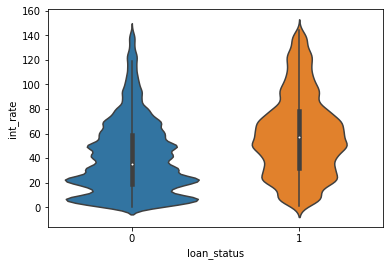

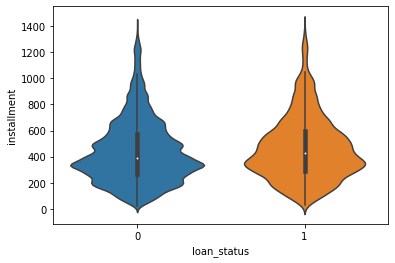

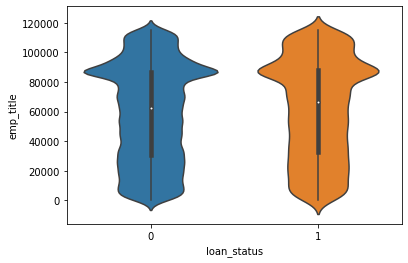

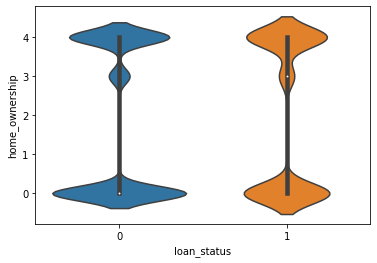

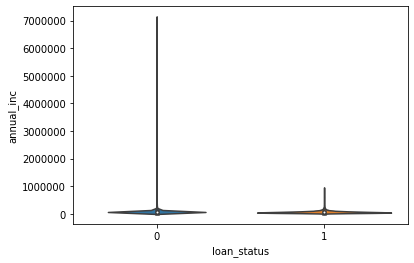

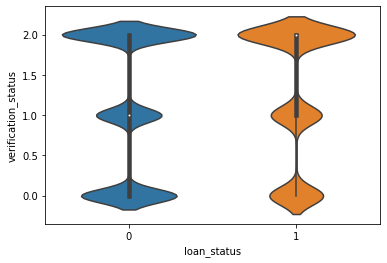

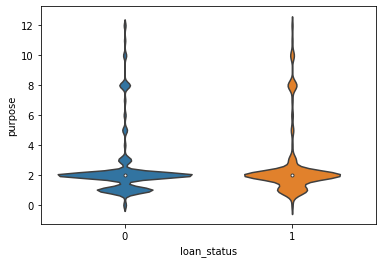

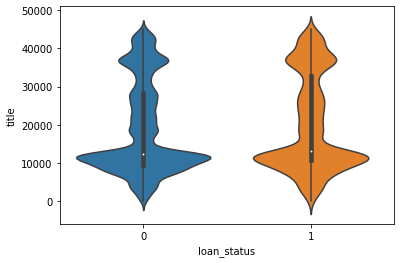

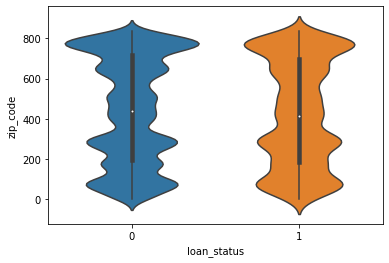

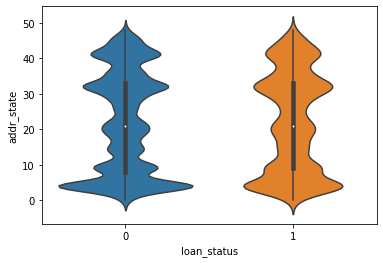

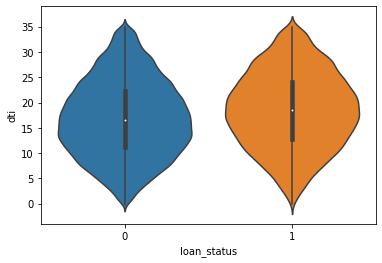

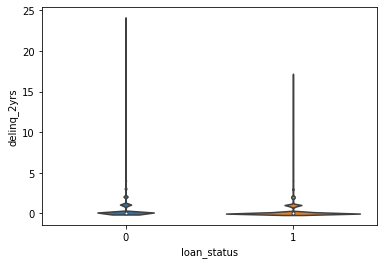

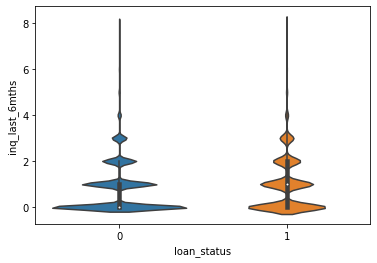

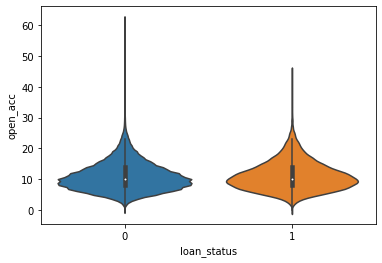

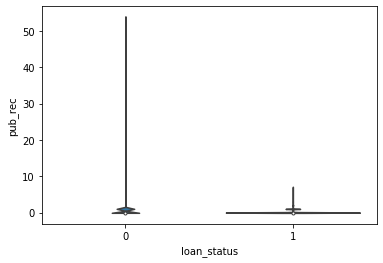

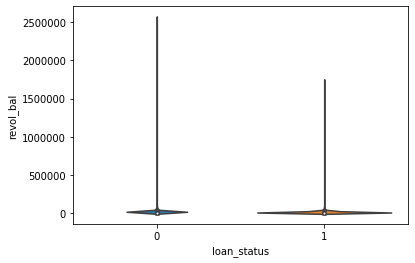

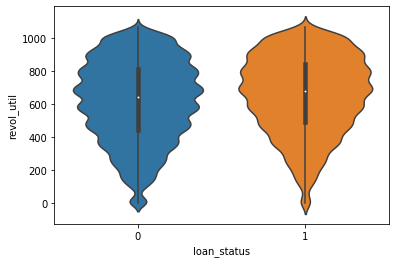

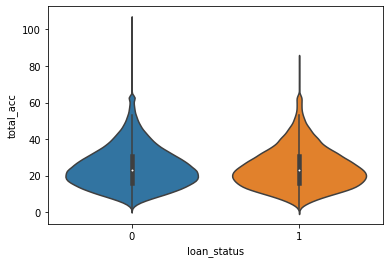

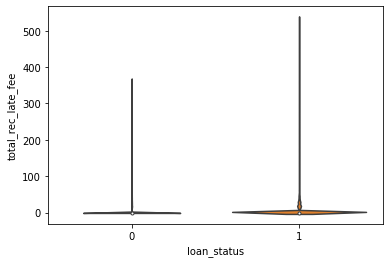

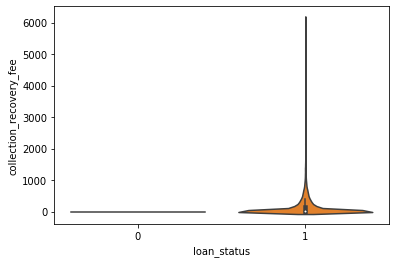

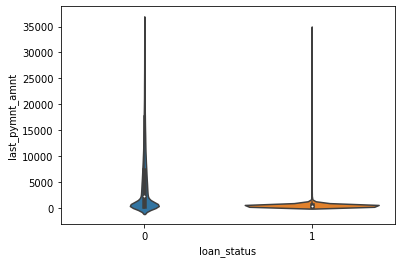

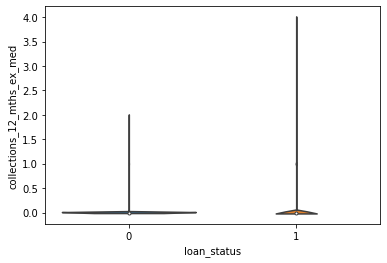

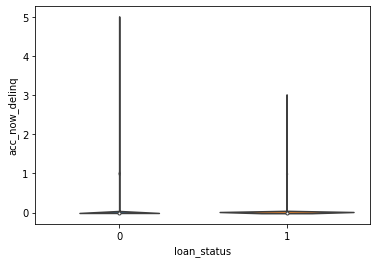

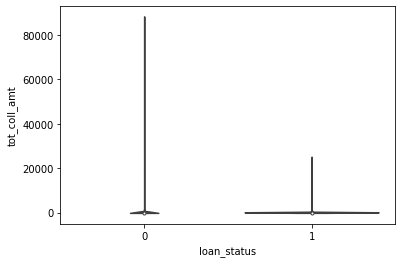

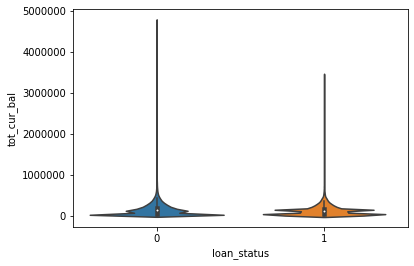

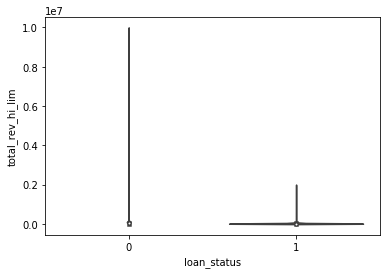

In [31]:
#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=df,x=x,y=y[i])  
    plt.show()

In [33]:
df

,loan_amnt,term,int_rate,installment,emp_title,home_ownership,annual_inc,verification_status,purpose,title,...,revol_bal,revol_util,total_acc,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,loan_status
0,27000.0,1,141,805.68,100315,4,120000.0,2,2,37697,...,20928.0,798,26.0,0.0,0.0,24502.20,0.0,0.0,48614.0,0
1,15000.0,0,77,551.36,94083,0,100000.0,1,2,7157,...,11051.0,688,20.0,0.0,0.0,838.69,0.0,0.0,47703.0,0
2,7000.0,0,8,222.28,64843,0,48000.0,0,2,8118,...,3579.0,172,18.0,0.0,0.0,5097.27,0.0,0.0,138287.0,0
3,18950.0,0,38,648.50,54947,4,54000.0,2,2,11576,...,35801.0,894,20.0,0.0,0.0,4407.62,0.0,0.0,75286.0,0
4,35000.0,1,108,976.04,56326,0,87000.0,2,1,8342,...,25391.0,506,29.0,0.0,0.0,17284.95,0.0,0.0,213561.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131723,12000.0,0,42,412.06,107147,0,65000.0,0,5,22063,...,11493.0,421,24.0,0.0,0.0,9279.76,0.0,0.0,26057.0,0
131724,12700.0,0,51,445.25,83712,4,43655.0,2,1,20857,...,26125.0,1036,19.0,0.0,0.0,3008.68,0.0,0.0,31063.0,0
131725,8875.0,0,24,295.29,84104,0,32000.0,2,2,12220,...,12636.0,449,30.0,0.0,0.0,2605.32,0.0,0.0,92243.0,0
131726,6500.0,0,57,229.46,113135,0,48000.0,1,2,37166,...,7129.0,1031,7.0,0.0,0.0,2365.41,0.0,0.0,152950.0,0


In [43]:
X = df.drop(['loan_status'],axis=1)
Y = df['loan_status'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [44]:
#Apply transform only for non-categorical data
from sklearn.preprocessing import StandardScaler
std_model = StandardScaler()
X_train_temp = std_model.fit_transform(X_train.iloc[:,:10])
X_test_temp = std_model.fit_transform(X_test.iloc[:,:10])

#Concatenate non-categorical data and categorical
X_train1 = np.concatenate((X_train_temp, X_train.iloc[:,10:]), axis = 1)
X_test1 = np.concatenate((X_test_temp, X_test.iloc[:,10:]), axis = 1)

print(type(X_train1))

scaled_features_train_df = pd.DataFrame(X_train1, index = X_train.index, columns = X_train.columns)
scaled_features_test_df = pd.DataFrame(X_test1, index = X_test.index, columns = X_test.columns)

<class 'numpy.ndarray'>


In [39]:
scaled_features_train_df.head()

,loan_amnt,term,int_rate,installment,emp_title,home_ownership,annual_inc,verification_status,purpose,title,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal
17884,2.543726,1.802579,0.241187,1.665353,0.645299,-0.957424,0.160013,0.973759,-0.696288,-0.878134,...,0.0,36522.0,399.0,18.0,0.0,0.0,30404.96,0.0,0.0,201595.000000
34007,1.311657,1.802579,-0.464169,0.515846,1.568685,-0.957424,-0.004447,-0.179235,-0.696288,-0.795275,...,0.0,24283.0,804.0,35.0,0.0,0.0,568.70,0.0,0.0,312220.000000
92846,0.079588,-0.554761,-0.656539,0.224881,-1.104751,1.113606,-0.239950,-0.179235,-0.216048,1.390608,...,0.0,14860.0,205.0,32.0,0.0,0.0,4765.21,0.0,0.0,14860.000000
37911,0.695623,1.802579,2.453441,0.519434,-1.287099,1.113606,-0.037300,0.973759,4.586345,1.199596,...,0.0,11363.0,714.0,24.0,0.0,0.0,12603.50,0.0,0.0,30206.000000
72491,-1.201764,-0.554761,-1.201587,-1.235964,0.268139,-0.957424,-0.338077,-1.332228,-0.216048,0.139174,...,0.0,5708.0,212.0,19.0,0.0,0.0,148.63,0.0,0.0,137324.135509


In [40]:
scaled_features_test_df.head()

,loan_amnt,term,int_rate,installment,emp_title,home_ownership,annual_inc,verification_status,purpose,title,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal
68351,-1.036143,-0.563183,-0.660307,-1.013047,-0.991918,-0.962360,1.244660,0.976706,3.602411,-1.281436,...,0.0,9184.0,808.0,18.0,0.0,0.0000,199.14,0.0,0.0,384627.0
105385,-0.544003,-0.563183,-0.628377,-0.463219,-1.656844,1.109583,-0.911892,-0.174301,-0.220534,-0.570932,...,0.0,10011.0,724.0,13.0,0.0,0.0000,1318.23,0.0,0.0,11403.0
98160,-0.267174,1.775623,1.159673,-0.510308,-1.339431,1.109583,-0.389780,-0.174301,-0.220534,-1.251315,...,0.0,4127.0,683.0,15.0,0.0,0.0000,6884.73,0.0,0.0,7444.0
119848,-1.479070,-0.563183,0.968097,-1.472239,0.430148,0.591597,-0.775689,-1.325307,2.646674,1.697722,...,0.0,8662.0,875.0,14.0,0.0,2.5012,87.80,0.0,0.0,12592.0
24147,1.682934,-0.563183,-0.660307,2.010593,-1.001434,1.109583,-0.037921,0.976706,-0.698403,-0.799176,...,0.0,28113.0,755.0,15.0,0.0,0.0000,19367.46,0.0,0.0,35835.0


In [46]:
#Logistic regression with GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report
import sklearn.metrics as metrics


# # parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# Code starts here

# instantiate logistic regression model
lr=LogisticRegression(random_state=33)
lr.fit(X_train,y_train)
# grid search on logistic regression

grid = GridSearchCV(estimator=lr, param_grid=parameters)
grid.fit(X_train, y_train)

# make predictions 
y_pred = grid.predict(X_test)
accuracy= grid.score(X_test,y_test)
f1_lg=f1_score(y_test,y_pred)

print ("F1 score:",f1_lg)

print('Classification_report rf with normal xgboost' + '\n' + classification_report(y_test,y_pred))

F1 score: 0.8341476906056973
Classification_report rf with normal xgboost
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     33224
           1       0.99      0.72      0.83      6295

    accuracy                           0.95     39519
   macro avg       0.97      0.86      0.90     39519
weighted avg       0.96      0.95      0.95     39519



In [50]:
from sklearn.metrics import confusion_matrix
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred_a= ad.predict(X_test)
confusion_matrix(y_test,y_pred)

from sklearn.metrics import precision_score,accuracy_score,f1_score
f1_score(y_test, y_pred_a,average='weighted')

0.988715975712072

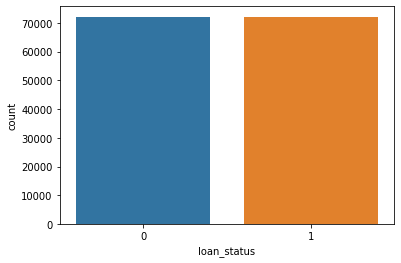

In [19]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
# Code starts here
smote = SMOTE(random_state=9)
#Fitting and transforming data points
X_sample, y_sample = smote.fit_sample(X_train, y_train)
# Check for count of class
sns.countplot(y_sample)

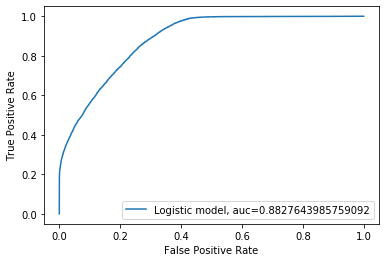

Confusion matrix
 [[26532 12238]
 [  704  6631]]
Classification_report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     38770
           1       0.35      0.90      0.51      7335

    accuracy                           0.72     46105
   macro avg       0.66      0.79      0.66     46105
weighted avg       0.88      0.72      0.76     46105



In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
import sklearn.metrics as metrics

import matplotlib.pyplot as plt


# Fit logistic regresion model on X_sample and y_sample
log_reg.fit(X_sample, y_sample)

# Store the result predicted in y_pred
y_pred = log_reg.predict(X_test)

# Store the auc_roc score
score = roc_auc_score(y_pred , y_test)

# Store the probablity of any class
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Plot the auc_roc_graph
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Print f1_score,Precision_score,recall_score,roc_auc_score and confusion matrix
f1 = f1_score(y_test, log_reg.predict(X_test))
precision = precision_score(y_test, log_reg.predict(X_test))
recall = recall_score(y_test, log_reg.predict(X_test))
# roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print('Confusion matrix' + '\n' ,confusion_matrix(y_test, log_reg.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

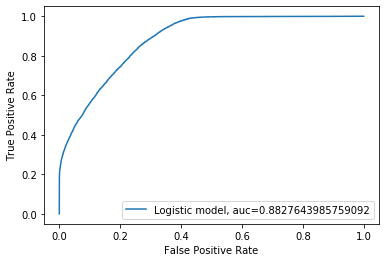

Confusion_matrix
 [[26532 12238]
 [  704  6631]]
Classification_report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     38770
           1       0.35      0.90      0.51      7335

    accuracy                           0.72     46105
   macro avg       0.66      0.79      0.66     46105
weighted avg       0.88      0.72      0.76     46105



In [26]:
# Import all the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

# Plot the auc-roc curve
score = roc_auc_score(y_pred , y_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Evaluation parameters for the model
f1 = f1_score(y_test, log_reg.predict(X_test))
precision = precision_score(y_test, log_reg.predict(X_test))
recall = recall_score(y_test, log_reg.predict(X_test))
roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, log_reg.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_smote=RandomForestClassifier(random_state=42)
rf_smote.fit(X_sample,y_sample)
y_pred_smote= rf_smote.predict(X_test)
accuracy_smote= rf_smote.score(X_test,y_test)
f1_smote=f1_score(y_test,y_pred_smote)


#plots


print("acuracy is :",accuracy_smote)
print ("F1 score:",f1_smote)
print('Classification_report rf with normal xgboost' + '\n' + classification_report(y_test,y_pred_smote))

acuracy is : 0.9582691682030149
F1 score: 0.8508064516129032
Classification_report rf with normal xgboost
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     38770
           1       0.99      0.75      0.85      7335

    accuracy                           0.96     46105
   macro avg       0.97      0.87      0.91     46105
weighted avg       0.96      0.96      0.96     46105



Accuracy is:  0.9584643747966598
F1_score: 0.8505890614028243


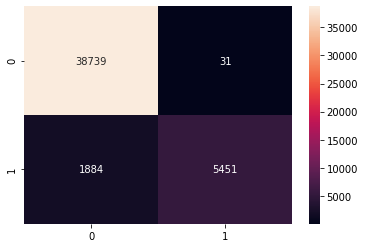

In [30]:
# Import RandomForestClassifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)
f1_1= f1_score(y_test,clf_rf.predict(X_test))
ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
print('F1_score:',f1_1)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [96]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
f1_gbc=f1_score(y_test, y_pred_gbc)
print("f1 is ",f1_gbc)
print(classification_report(y_test, y_pred_gbc))

f1 is  0.8498296351699492
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     36569
           1       1.00      0.74      0.85      6902

    accuracy                           0.96     43471
   macro avg       0.97      0.87      0.91     43471
weighted avg       0.96      0.96      0.96     43471



In [ ]:
## from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(base_estimator = gbc, n_estimators=100)
adc.fit(X_train, y_train)
y_pred_adc = adc.predict(X_test)
accuracy_en=adc.score(X_test,y_test)
recall_en= recall_score(y_test,y_pred_adc)
precision_en= precision_score(y_test,y_pred_adc)
f1_en= f1_score(y_test,y_pred_adc)

#plots
# plot_cm(adc, y_pred_adc)
#After Sampling    
print("precision is :",precision_en)
print("acuracy is :",accuracy_en)
print("recall is :",recall_en)
print("f1 score is :",f1_en)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_adc , y_test)
y_pred_proba = adc.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Adaboost with ensamble, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report
# Instantiate the  XGBoost model
xgb = XGBClassifier(learning_rate=0.0001)

# Fit the model on train

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

# Store the different evaluation values.

f1 = f1_score(y_test, xgb.predict(X_test))
precison = precision_score(y_test, xgb.predict(X_test))
recall = recall_score(y_test, xgb.predict(X_test))
# roc_auc = roc_auc_score(y_test, xgb.predict(X_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print((f1))


[[38746    24]
 [ 1913  5422]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     38770
           1       1.00      0.74      0.85      7335

    accuracy                           0.96     46105
   macro avg       0.97      0.87      0.91     46105
weighted avg       0.96      0.96      0.96     46105

0.8484469133870589


### Define the following functions as per the description, so that they can be called later to perform the tasks.

In [2]:
# Remove correlated features

def remove_corelated_features(X_train,val):
    """ Function to remove the correlated features
    
    This function accepts the dataframe X_train,val which creates a correlation matix and removes 
    the correlated features based on certain threshold.
    
    Keyword arguments:
    X_train - Pandas dataframe which contains the independent features.
    val - Certain threshold value by which correlated features to be dropped.
    to_drop - Columns to be dropped
    
    """
    
    
    
    
    return X_train.drop(to_drop,axis=1)



In [3]:
# check the distribution of the passed features
    
def cal_eval_metric(y_test, y_pred, metric):
    """  Check the distribution of the passed features
    
    This function will check for the metric passed(accuracy/precision/recall/f1) 
    and return the required value.
    
    Keyword Arguments:   
    y_test: actual target values
    y_pred: predicted target values
    metric: the metric to be calculated
    
    Return:
    score - Calculated Evaluation Score
    
    """
    
    
    
    
    
    return score



### Read the dataset. Take a look at the dataset. 

* Check the data types present in the dataframe.
* Call the num_and_cat_columns() with train as the parameter and store the results.
* Are there any missing values? Are there any Outliers? How do you want to treat them?


In [4]:
# Code starts here







# Code ends here

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data and apply some data preprocessing techniques

In [5]:
# Code starts here





# Code ends here

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Total Compensation`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score.



In [6]:
# Code starts here





# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [52]:
# Code starts here
test_data=pd.read_csv('test.csv')




# Code ends here

In [13]:
# Identify the unnecessary columns and remove it 
test_data.drop(['Id','funded_amnt','grade','recoveries'],axis = 1, inplace = True)

In [53]:
test_data.drop(['Id'],axis = 1, inplace = True)

In [54]:
test_data

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,...,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000.0,20000.0,0,6,625.81,0,76811,4,100000.0,2,...,10.0,0.0,0.00,0.0000,14478.40,0.0,0.0,0.0,21984.0,24800.0
1,12000.0,12000.0,0,42,412.06,2,56215,0,75000.0,0,...,45.0,0.0,0.00,0.0000,7429.40,0.0,0.0,0.0,265284.0,14200.0
2,19750.0,19750.0,0,41,677.89,2,84972,4,45000.0,0,...,42.0,0.0,939.59,169.0398,677.89,0.0,0.0,0.0,21120.0,78400.0
3,11000.0,11000.0,0,1,334.80,0,93121,0,82000.0,0,...,35.0,0.0,3.08,0.0000,334.80,0.0,0.0,0.0,215435.0,14200.0
4,11200.0,11200.0,0,20,367.42,1,82777,0,64000.0,0,...,20.0,0.0,0.00,0.0000,367.54,0.0,0.0,960.0,150933.0,27600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56450,7200.0,7200.0,0,20,236.20,1,81302,0,42300.0,2,...,21.0,0.0,378.38,68.0274,100.00,0.0,0.0,0.0,128598.0,14000.0
56451,12550.0,12550.0,1,49,300.61,2,86847,4,36300.0,1,...,9.0,0.0,695.49,6.8869,300.61,0.0,0.0,0.0,11363.0,35000.0
56452,10000.0,10000.0,0,69,362.78,3,77579,0,84000.0,2,...,58.0,0.0,0.00,0.0000,362.74,0.0,0.0,0.0,346714.0,13700.0
56453,16000.0,16000.0,1,51,387.40,2,14932,4,65000.0,2,...,29.0,0.0,0.00,0.0000,1148.67,0.0,0.0,0.0,46793.0,34200.0


In [82]:
test_data.drop(['total_rev_hi_lim','tot_coll_amt'],axis = 1, inplace = True)

In [83]:
test_data.drop(['pub_rec','collections_12_mths_ex_med','acc_now_delinq'],axis = 1, inplace = True)

In [55]:
test=pd.read_csv('test.csv')
id_ = test['Id']

In [56]:
test_data

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,...,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000.0,20000.0,0,6,625.81,0,76811,4,100000.0,2,...,10.0,0.0,0.00,0.0000,14478.40,0.0,0.0,0.0,21984.0,24800.0
1,12000.0,12000.0,0,42,412.06,2,56215,0,75000.0,0,...,45.0,0.0,0.00,0.0000,7429.40,0.0,0.0,0.0,265284.0,14200.0
2,19750.0,19750.0,0,41,677.89,2,84972,4,45000.0,0,...,42.0,0.0,939.59,169.0398,677.89,0.0,0.0,0.0,21120.0,78400.0
3,11000.0,11000.0,0,1,334.80,0,93121,0,82000.0,0,...,35.0,0.0,3.08,0.0000,334.80,0.0,0.0,0.0,215435.0,14200.0
4,11200.0,11200.0,0,20,367.42,1,82777,0,64000.0,0,...,20.0,0.0,0.00,0.0000,367.54,0.0,0.0,960.0,150933.0,27600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56450,7200.0,7200.0,0,20,236.20,1,81302,0,42300.0,2,...,21.0,0.0,378.38,68.0274,100.00,0.0,0.0,0.0,128598.0,14000.0
56451,12550.0,12550.0,1,49,300.61,2,86847,4,36300.0,1,...,9.0,0.0,695.49,6.8869,300.61,0.0,0.0,0.0,11363.0,35000.0
56452,10000.0,10000.0,0,69,362.78,3,77579,0,84000.0,2,...,58.0,0.0,0.00,0.0000,362.74,0.0,0.0,0.0,346714.0,13700.0
56453,16000.0,16000.0,1,51,387.40,2,14932,4,65000.0,2,...,29.0,0.0,0.00,0.0000,1148.67,0.0,0.0,0.0,46793.0,34200.0


In [16]:
# Code starts here
# Predict on the test data
y_pred_rf_smote = xgb.predict(test_data)

print(y_pred_rf_smote)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'loan_status':y_pred_rf_smote})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sub_rf_xgb.csv',index=False)

[0 0 1 ... 0 0 1]


In [57]:
# Code starts here
# Predict on the test data
y_pred_rf_smote = ad.predict(test_data)

print(y_pred_rf_smote)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'loan_status':y_pred_rf_smote})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sub_rf_ad.csv',index=False)

[0 0 1 ... 0 0 1]


In [58]:
sample_submission.loan_status.value_counts()

0    48139
1     8316
Name: loan_status, dtype: int64